In [19]:
# Step 1.Importing Libraries and Reading Dataset

# Importing libraries and reading dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

file_path = "/content/dataset.csv"
data = pd.read_csv(file_path)
data

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,high_bike_demand


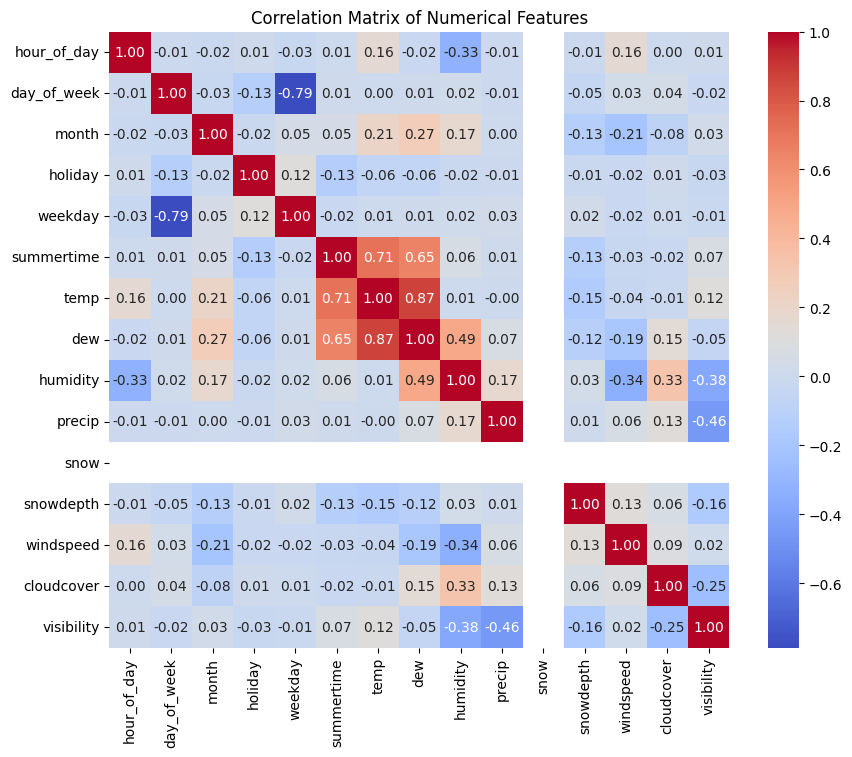

In [20]:
# Reloading the dataset to analyze correlations, outliers, and range of values
import matplotlib.pyplot as plt

# Ensure numerical columns are selected
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Encoding categorical data
data['increase_stock_encoded'] = data['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})
# Re-run correlation analysis with the new encoded column

# Identifying outliers using boxplot for key features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

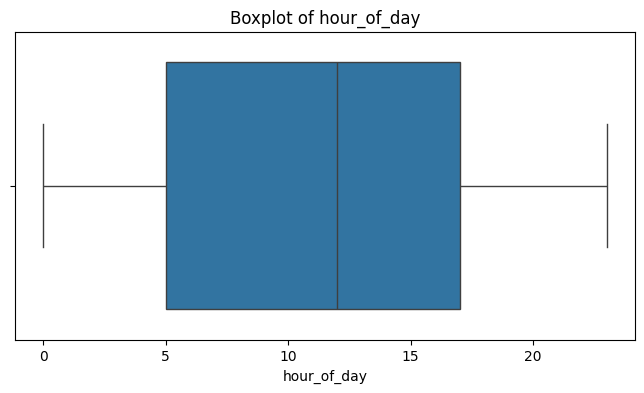

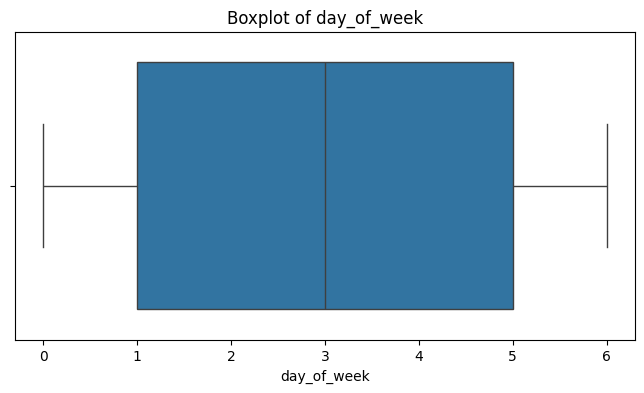

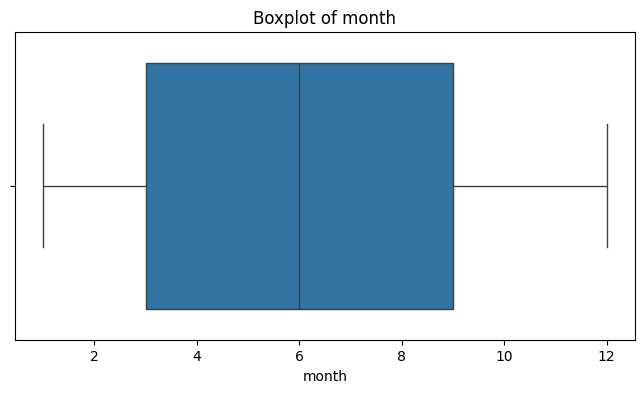

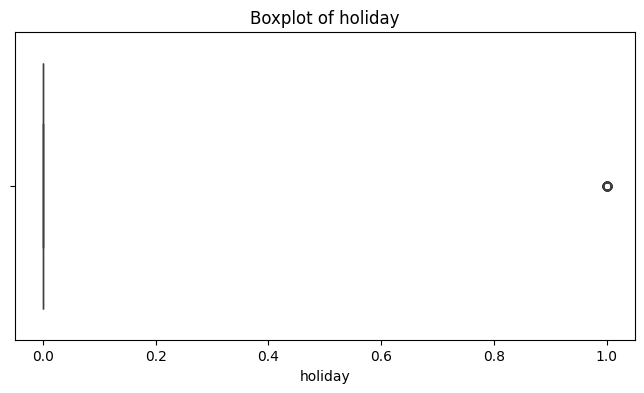

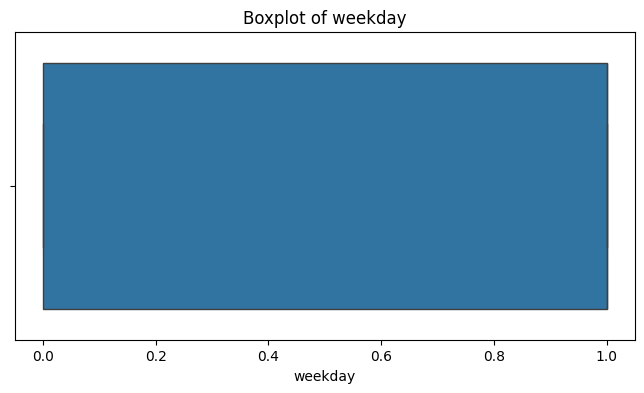

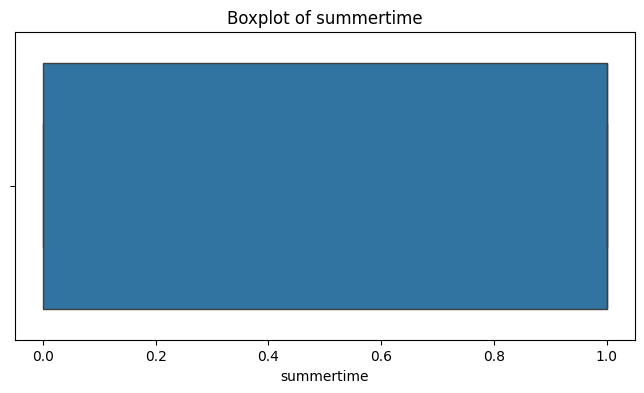

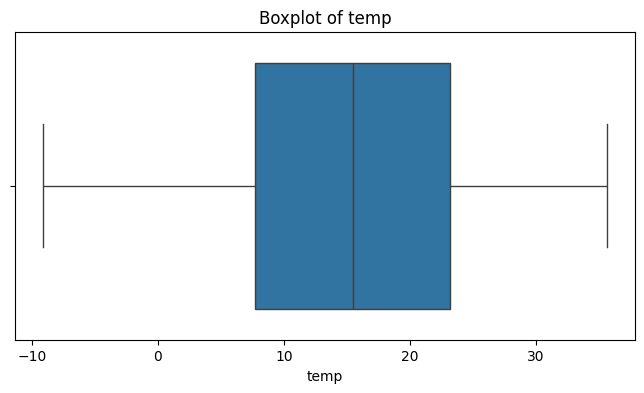

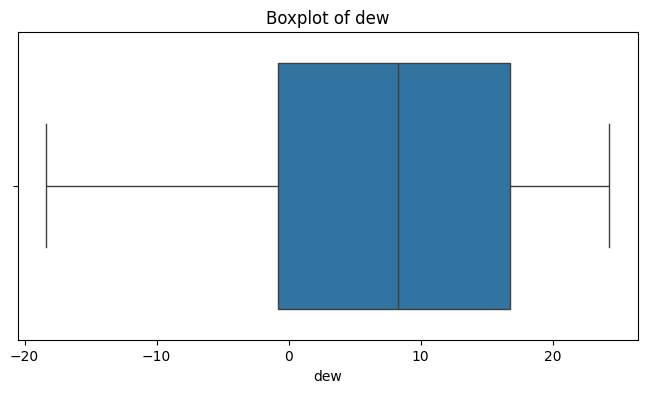

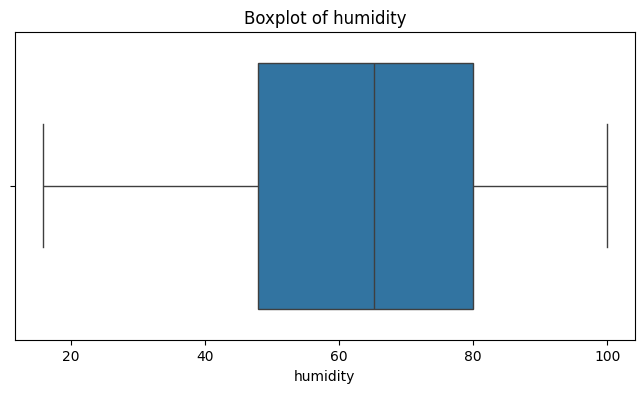

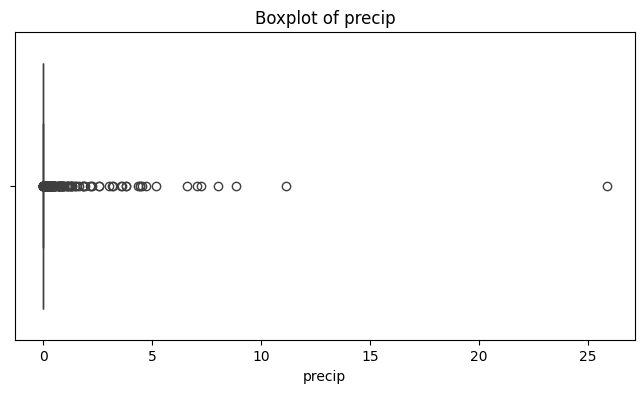

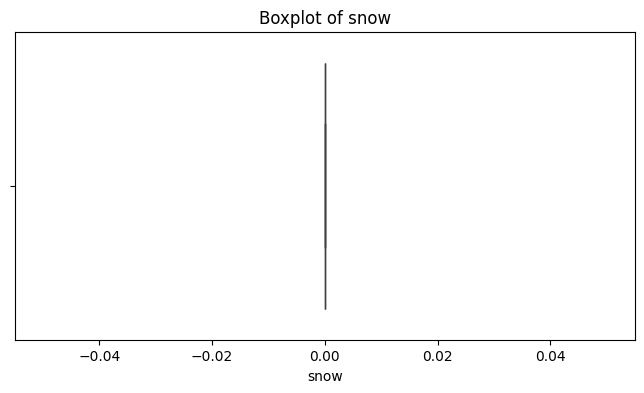

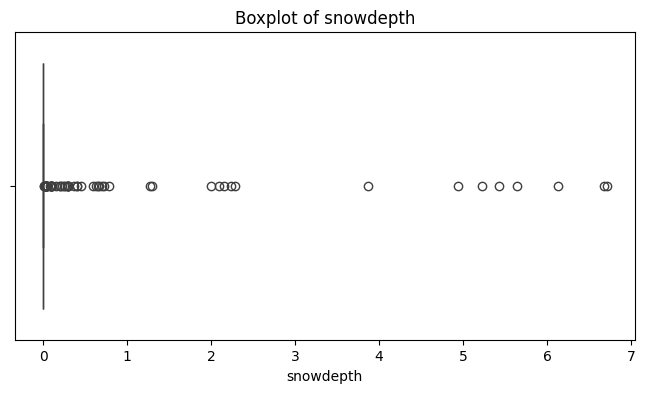

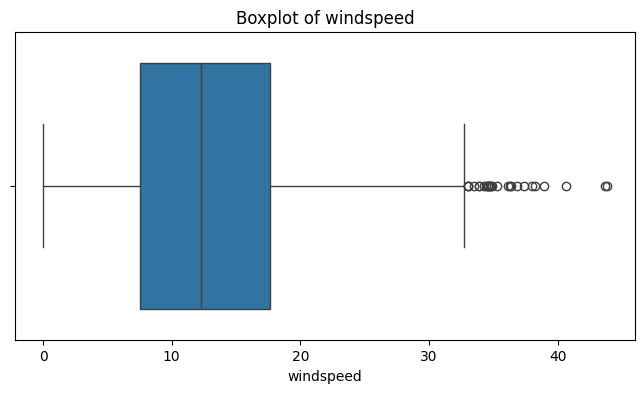

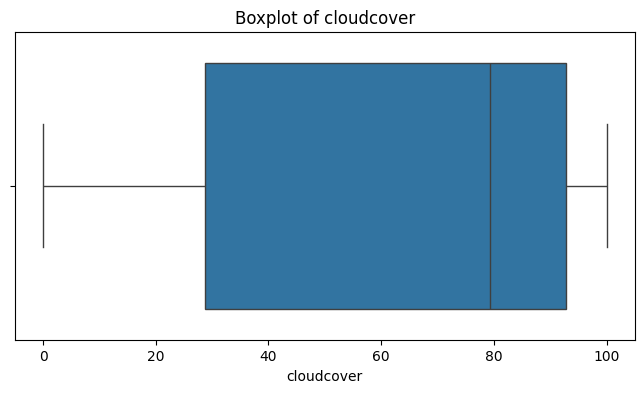

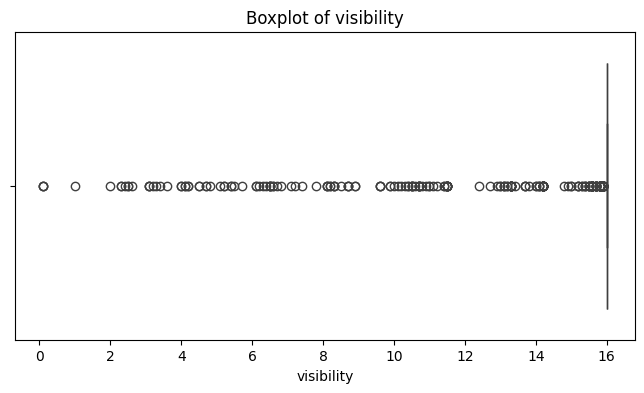

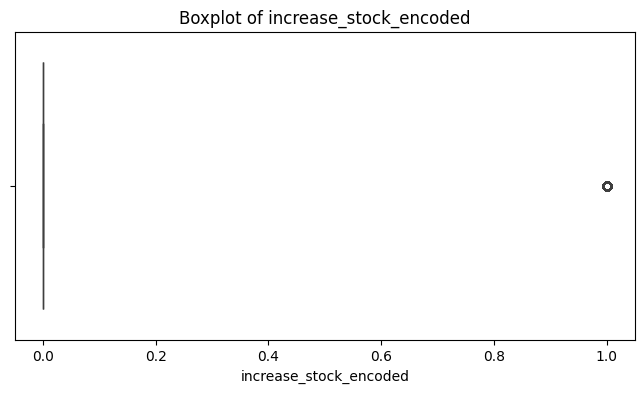

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock_encoded
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,3.022500,6.468750,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.0,0.042713,13.082500,64.322375,15.344125,0.180000
std,6.94837,2.012965,3.454741,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.0,0.421198,7.756652,32.748869,2.323737,0.384308
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000,0.000000
25%,5.00000,1.000000,3.000000,0.000000,0.000000,0.00000,7.700000,-0.800000,47.845000,0.000000,0.0,0.000000,7.500000,28.800000,16.000000,0.000000
50%,12.00000,3.000000,6.000000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.0,0.000000,12.300000,79.300000,16.000000,0.000000
75%,17.00000,5.000000,9.000000,0.000000,1.000000,1.00000,23.200000,16.800000,79.955000,0.000000,0.0,0.000000,17.600000,92.800000,16.000000,0.000000
max,23.00000,6.000000,12.000000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,0.0,6.710000,43.800000,100.000000,16.000000,1.000000


In [21]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Checking range of values for each feature
data.describe()

In [22]:
# Step 2. Analyzing data by some statistics of the data set

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identify numerical and categorical features
numerical_features = ['hour_of_day', 'temp', 'dew', 'humidity', 'precip',
                      'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']
categorical_features = ['day_of_week', 'month', 'holiday', 'weekday', 'summertime']


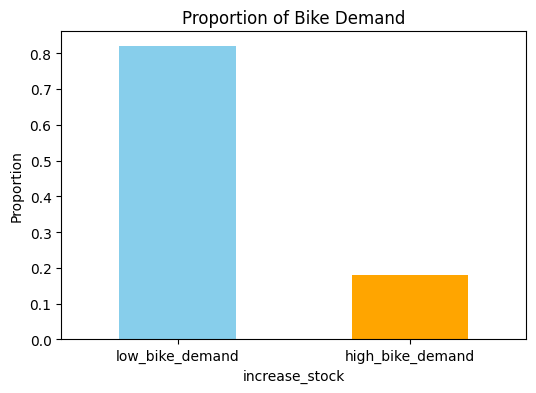

In [23]:

# 2. Check trends in the target variable 'increase_stock'
bike_demand_trend = data['increase_stock'].value_counts(normalize=True)

# Plot the proportion of 'low_bike_demand' vs 'high_bike_demand'
plt.figure(figsize=(6, 4))
bike_demand_trend.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Proportion of Bike Demand')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

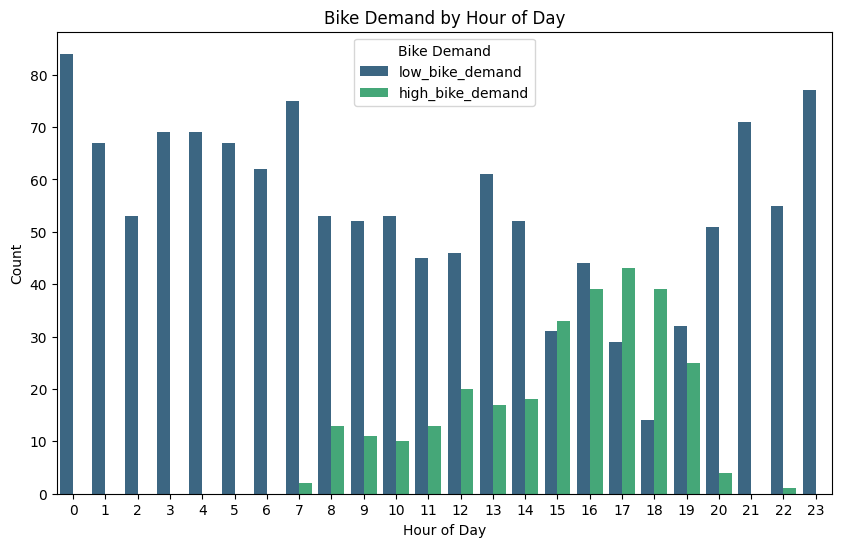

In [24]:
# 3. Trends by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='hour_of_day', hue='increase_stock', palette='viridis')
plt.title('Bike Demand by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Bike Demand')
plt.show()

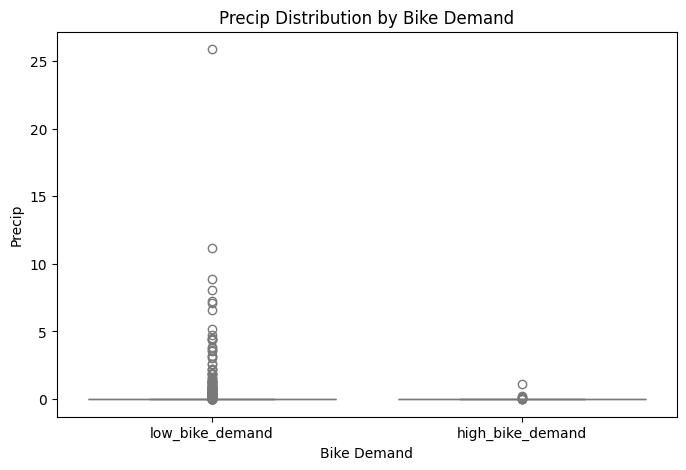

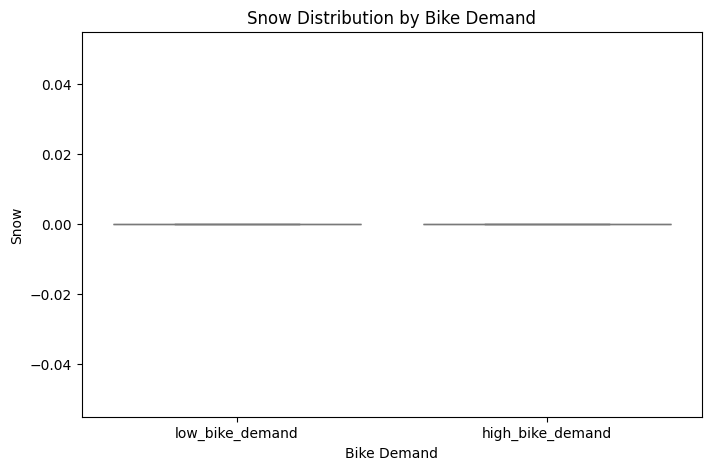

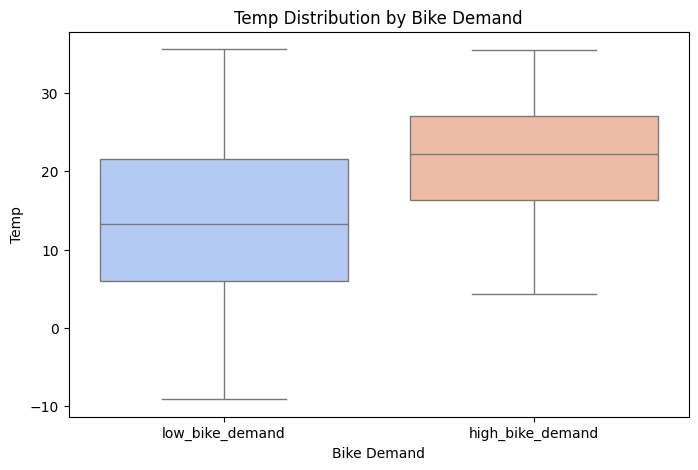

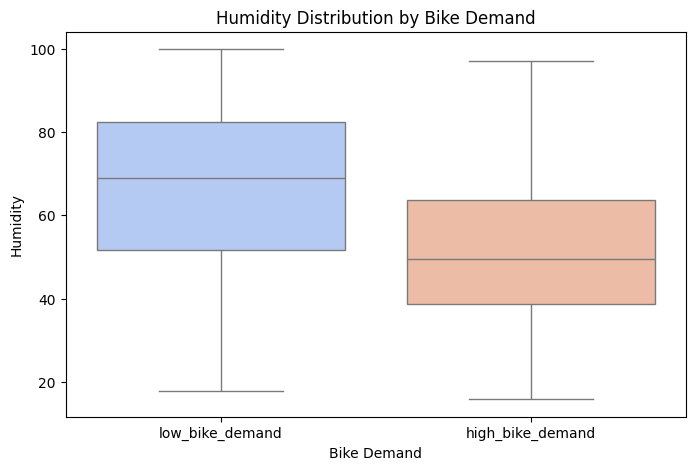

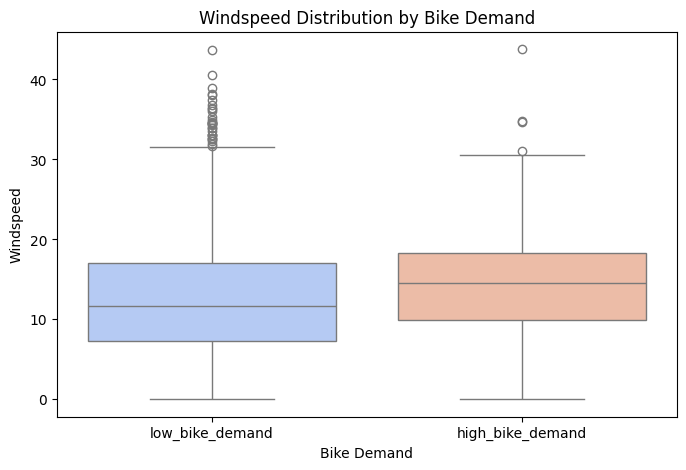

In [25]:
# 4. Trends by weather and temporal features (precipitation, holidays, etc.)
weather_features = ['precip', 'snow', 'temp', 'humidity', 'windspeed']

for feature in weather_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x='increase_stock', y=feature, hue='increase_stock', palette='coolwarm', dodge=False)
    plt.title(f'{feature.capitalize()} Distribution by Bike Demand')
    plt.xlabel('Bike Demand')
    plt.ylabel(feature.capitalize())
    plt.show()

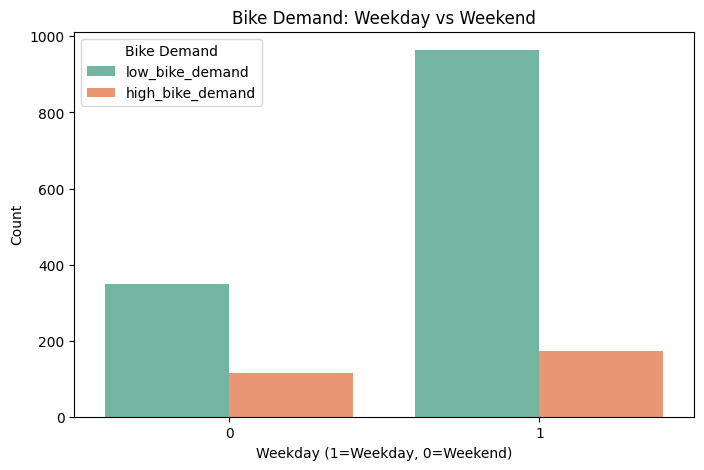

In [26]:
# 5. Trends by weekday/weekend and holidays
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='weekday', hue='increase_stock', palette='Set2')
plt.title('Bike Demand: Weekday vs Weekend')
plt.xlabel('Weekday (1=Weekday, 0=Weekend)')
plt.ylabel('Count')
plt.legend(title='Bike Demand')
plt.show()

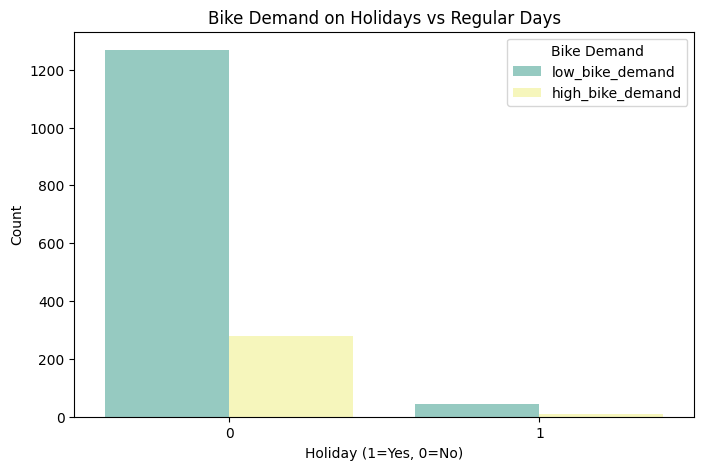

In [27]:

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='holiday', hue='increase_stock', palette='Set3')
plt.title('Bike Demand on Holidays vs Regular Days')
plt.xlabel('Holiday (1=Yes, 0=No)')
plt.ylabel('Count')
plt.legend(title='Bike Demand')
plt.show()